<a href="https://colab.research.google.com/github/bintangnabiil/Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/main/Rangkuman_Chapter_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 11: Training Deep Neural Networks
Chapter ini membahas tantangan dalam melatih deep neural networks dan berbagai teknik untuk mengatasinya. Deep networks (networks dengan banyak hidden layers) memiliki potensi besar tetapi juga menghadapi masalah khusus seperti vanishing gradients, overfitting, dan computational complexity.

##1. The Vanishing/Exploding Gradients Problem
###Vanishing Gradients

- Problem: Gradients menjadi sangat kecil saat dipropagasi ke layer awal
- Cause: Multiplication of small values (derivatives) across many layers
- Effect: Layer awal belajar sangat lambat atau bahkan tidak belajar sama sekali
- Impact: Deep networks sulit untuk converge

###Exploding Gradients

- Problem: Gradients menjadi sangat besar dan tidak stabil
- Cause: Multiplication of large values across layers
- Effect: Weights berubah drastis, training menjadi tidak stabil
- Solution: Gradient clipping

###Mathematical Explanation
Dalam deep network dengan n layers:
$$
∂C/∂w₁ = ∂C/∂aₙ × ∂aₙ/∂aₙ₋₁ × ... × ∂a₂/∂a₁ × ∂a₁/∂w₁
$$

- Jika derivatives kecil (< 1), product akan vanish
- Jika derivatives besar (> 1), product akan explode

##2. Reusing Pretrained Layers
###Transfer Learning

- Concept: Menggunakan knowledge dari pretrained model
- Benefits: Faster training, better performance dengan less data
- Applications: Computer vision, NLP, speech recognition

###Transfer Learning Strategies

- Feature Extraction: Freeze pretrained layers, train classifier saja
- Fine-tuning: Unfreeze beberapa top layers untuk fine-tuning
- Full Training: Use pretrained weights sebagai initialization

###When to Use Transfer Learning

- Similar domains: Source dan target domain mirip
- Limited data: Target dataset kecil
- Computational constraints: Limited training resources

##3. Unsupervised Pretraining
###Concept

- Train network layer by layer secara unsupervised
- Each layer learns to reconstruct input dari layer sebelumnya
- Fine-tune seluruh network dengan supervised learning

###Autoencoders untuk Pretraining

- Encoder: Compress input ke lower-dimensional representation
- Decoder: Reconstruct original input dari compressed representation
- Stacked Autoencoders: Multiple autoencoders stacked together

###Restricted Boltzmann Machines (RBMs)

- Structure: Bipartite graph dengan visible dan hidden units
- Training: Contrastive divergence algorithm
- Deep Belief Networks: Stack of RBMs

##4. Faster Optimizers
###Problems dengan Standard SGD

- Slow convergence: Terutama di flat regions
- Poor conditioning: Different scales di different directions
- Local minima: Dapat stuck di suboptimal solutions

###Momentum

- Concept: Accumulate velocity dari past gradients
- Formula: v = βv + η∇θJ(θ), θ = θ - v
- Benefits: Faster convergence, escape shallow local minima
- Hyperparameter: β (momentum coefficient, typically 0.9)

###Nesterov Accelerated Gradient (NAG)

- Improvement: Look ahead sebelum compute gradient
- Formula: Compute gradient di anticipated position
- Benefits: More precise updates, better convergence

###AdaGrad

- Concept: Adaptive learning rates per parameter
- Formula: Accumulate squared gradients, scale learning rate
- Benefits: Automatic learning rate scheduling
- Problems: Learning rate decays too aggressively

###RMSprop

- Improvement: Exponential decay untuk squared gradients
- Formula: s = βs + (1-β)∇θJ(θ)²
- Benefits: Prevents learning rate dari vanishing completely

###Adam Optimizer

- Combination: Momentum + RMSprop
- Features: Bias correction, adaptive learning rates
- Formula:
  - m = β₁m + (1-β₁)∇θJ(θ) (momentum)
  - s = β₂s + (1-β₂)∇θJ(θ)² (RMSprop)
- Default hyperparameters: β₁=0.9, β₂=0.999, ε=1e-8

###AdamW

- Improvement: Decoupled weight decay
- Benefits: Better generalization, more stable training

##5. Learning Rate Scheduling
###Why Schedule Learning Rate?

- High LR: Fast initial progress, tapi dapat overshoot minimum
- Low LR: Precise convergence, tapi slow progress
- Solution: Start high, gradually decrease

###Scheduling Strategies
- Step Decay
  - Decrease LR by factor setiap few epochs
  - Example: LR × 0.1 every 10 epochs

- Exponential Decay

  - Formula: lr = lr₀ × decay_rate^(epoch/decay_steps)

- Cosine Annealing

  - Formula: lr = lr_min + (lr_max - lr_min) × (1 + cos(π × epoch/max_epochs))/2

- Reduce on Plateau

  - Reduce LR when validation metric stops improving

- Cyclic Learning Rates

  - Concept: Cycle LR between bounds
  - Benefits: Escape local minima, faster convergence

- One Cycle Policy

  - Structure: Increase LR, then decrease
  - Benefits: Very fast training dengan good results

##6. Avoiding Overfitting Through Regularization
###Early Stopping

- Concept: Stop training when validation error starts increasing
- Implementation: Monitor validation loss, save best model
- Benefits: Simple, effective regularization

###L1 and L2 Regularization

- L1 (Lasso): λ∑|wᵢ| - promotes sparsity
- L2 (Ridge): λ∑wᵢ² - prevents large weights
Elastic Net: Combination of L1 and L2

###Dropout

- Concept: Randomly set neurons to zero during training
- Benefits: Prevents co-adaptation, improves generalization
- Rate: Typically 0.2-0.5 untuk hidden layers
- Implementation: Only during training, scale during inference

###Batch Normalization

- Concept: Normalize inputs ke each layer
- Benefits: Faster training, acts as regularization
- Process: Normalize, then scale and shift
- Formula: BN(x) = γ × (x - μ)/σ + β

###Layer Normalization

- Alternative: Normalize across features instead of batch
- Benefits: Works dengan small batches, RNNs

###Data Augmentation

- Concept: Artificially increase dataset size
- Techniques: Rotation, flip, crop, noise addition
- Benefits: Better generalization, robust models

##7. Summary dan Guidelines
###Best Practices untuk Deep Learning

- Initialization: Use appropriate weight initialization
- Activation: ReLU family untuk hidden layers
- Batch Normalization: Add after dense layers
- Optimizer: Start dengan Adam
- Learning Rate: Use scheduling
- Regularization: Dropout + early stopping
- Monitoring: Track training dan validation metrics

#Implementasi Kode
##1. Handling Vanishing Gradients dengan Better Initialization

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Xavier/Glorot Initialization
def create_model_xavier():
    model = keras.Sequential([
        keras.layers.Dense(100, activation='relu',
                          kernel_initializer='glorot_uniform'),
        keras.layers.Dense(100, activation='relu',
                          kernel_initializer='glorot_uniform'),
        keras.layers.Dense(100, activation='relu',
                          kernel_initializer='glorot_uniform'),
        keras.layers.Dense(10, activation='softmax')
    ])
    return model

# He Initialization (untuk ReLU)
def create_model_he():
    model = keras.Sequential([
        keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_uniform'),
        keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_uniform'),
        keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_uniform'),
        keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Compare initialization effects
model_xavier = create_model_xavier()
model_he = create_model_he()

##2. Transfer Learning Implementation

In [2]:
# Load pretrained model
base_model = keras.applications.VGG16(
    weights='imagenet',  # Use ImageNet weights
    include_top=False,   # Exclude final classifier
    input_shape=(224, 224, 3)
)

# Freeze pretrained layers
base_model.trainable = False

# Add custom classifier
model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')  # 10 classes
])

# Compile untuk feature extraction
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train classifier only
# history = model.fit(train_data, epochs=10)

# Fine-tuning: Unfreeze top layers
base_model.trainable = True

# Freeze bottom layers, fine-tune top layers
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Use lower learning rate untuk fine-tuning
model.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


##3. Different Optimizers Comparison

Training with SGD


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with SGD_Momentum
Training with Adam
Training with RMSprop
Training with AdamW


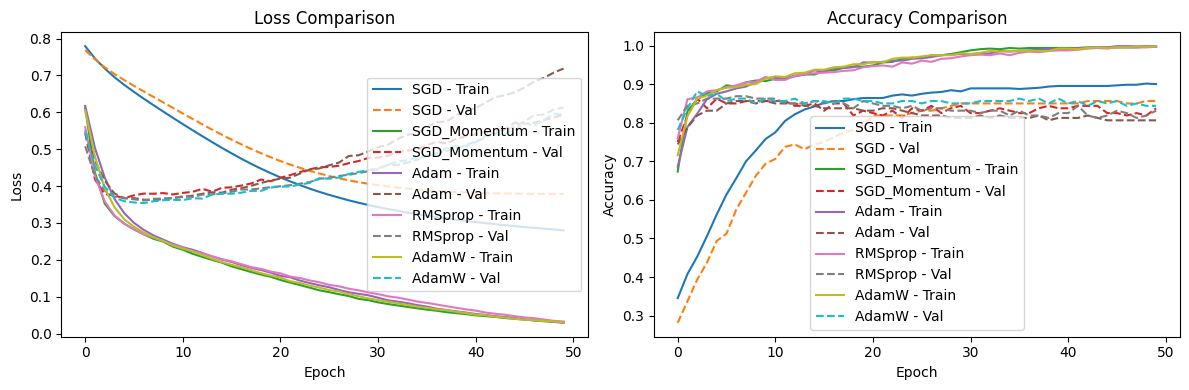

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                          random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def create_model():
    return keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=[20]),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

# Different optimizers
optimizers = {
    'SGD': keras.optimizers.SGD(learning_rate=0.01),
    'SGD_Momentum': keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Adam': keras.optimizers.Adam(),
    'RMSprop': keras.optimizers.RMSprop(),
    'AdamW': keras.optimizers.AdamW()
}

histories = {}

for name, optimizer in optimizers.items():
    print(f"Training with {name}")
    model = create_model()
    model.compile(optimizer=optimizer, loss='binary_crossentropy',
                 metrics=['accuracy'])

    history = model.fit(X_train_scaled, y_train, epochs=50,
                       validation_split=0.2, verbose=0)
    histories[name] = history

# Plot comparison
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
for name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{name} - Train')
    plt.plot(history.history['val_loss'], label=f'{name} - Val', linestyle='--')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{name} - Train')
    plt.plot(history.history['val_accuracy'], label=f'{name} - Val', linestyle='--')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

##4. Learning Rate Scheduling

In [8]:
# 1. Exponential Decay
def exponential_decay(epoch):
    initial_lrate = 0.1
    k = 0.1
    lrate = initial_lrate * np.exp(-k*epoch)
    return lrate

# 2. Step Decay
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10
    lrate = initial_lrate * (drop ** np.floor((1+epoch)/epochs_drop))
    return lrate

# 3. Cosine Annealing
def cosine_annealing(epoch, max_epochs=100):
    min_lr = 1e-6
    max_lr = 1e-1
    return min_lr + (max_lr - min_lr) * (1 + np.cos(np.pi * epoch / max_epochs)) / 2

# Keras callbacks
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay)

# Reduce on Plateau
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Cyclic Learning Rate
class CyclicLR(keras.callbacks.Callback):
    def __init__(self, base_lr=1e-4, max_lr=1e-2, step_size=2000):
        super(CyclicLR, self).__init__()
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.clr_iterations = 0

    def on_train_begin(self, logs=None):
        self.clr_iterations = 0

    def on_batch_end(self, batch, logs=None):
        self.clr_iterations += 1
        cycle = np.floor(1 + self.clr_iterations / (2 * self.step_size))
        x = np.abs(self.clr_iterations / self.step_size - 2 * cycle + 1)
        lr = self.base_lr + (self.max_lr - self.base_lr) * np.maximum(0, (1 - x))

        # Assign learning rate safely
        if hasattr(self.model.optimizer, 'learning_rate'):
            if hasattr(self.model.optimizer.learning_rate, 'assign'):
                self.model.optimizer.learning_rate.assign(lr)

# Usage
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

clr = CyclicLR(base_lr=1e-4, max_lr=1e-2, step_size=100)
history = model.fit(X_train_scaled, y_train, epochs=50,
                   validation_split=0.2, callbacks=[clr], verbose=1)

Epoch 1/50


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5764 - loss: 0.6940 - val_accuracy: 0.7688 - val_loss: 0.5647
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8133 - loss: 0.5160 - val_accuracy: 0.8687 - val_loss: 0.3746
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8797 - loss: 0.3420 - val_accuracy: 0.8500 - val_loss: 0.3704
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8920 - loss: 0.2562 - val_accuracy: 0.8813 - val_loss: 0.3675
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9210 - loss: 0.2125 - val_accuracy: 0.8313 - val_loss: 0.3863
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9466 - loss: 0.1653 - val_accuracy: 0.8625 - val_loss: 0.3948
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9579 - loss: 0.1272 - val_accuracy: 0.8313 - val_loss: 0.4168
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9631 - loss: 0.1208 - val_accuracy: 0.8438 - val_loss: 0.4247


##5. Regularization Techniques

In [9]:
# Model dengan berbagai regularization techniques
def create_regularized_model(input_shape, num_classes):
    model = keras.Sequential([
        # Input layer dengan dropout
        keras.layers.Dense(128, input_shape=input_shape),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.Dropout(0.3),

        # Hidden layer dengan L2 regularization
        keras.layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.Dropout(0.4),

        # Another hidden layer
        keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.Dropout(0.5),

        # Output layer
        keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Create dan compile model
model = create_regularized_model(input_shape=[20], num_classes=2)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

# Train dengan regularization
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 266ms/step - accuracy: 0.4905 - loss: 1.3417 - val_accuracy: 0.6875 - val_loss: 1.0185
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6054 - loss: 1.1037 - val_accuracy: 0.7750 - val_loss: 0.9611
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6255 - loss: 1.0162 - val_accuracy: 0.7625 - val_loss: 0.9131
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7133 - loss: 0.9283 - val_accuracy: 0.7812 - val_loss: 0.8665
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7131 - loss: 0.9030 - val_accuracy: 0.8062 - val_loss: 0.8216
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7393 - loss: 0.8800 - val_accuracy: 0.8188 - val_loss: 0.7941
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7799 - loss: 0.8232 - val_accuracy: 0.8250 - val_loss: 0.7712
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7626 - loss: 0.8327 - val_accuracy: 0.8500 

##6. Batch Normalization Implementation

In [10]:
# Manual Batch Normalization layer
class CustomBatchNormalization(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(CustomBatchNormalization, self).__init__(**kwargs)

    def build(self, input_shape):
        # Learnable parameters
        self.gamma = self.add_weight(
            shape=(input_shape[-1],),
            initializer='ones',
            trainable=True,
            name='gamma'
        )
        self.beta = self.add_weight(
            shape=(input_shape[-1],),
            initializer='zeros',
            trainable=True,
            name='beta'
        )
        super(CustomBatchNormalization, self).build(input_shape)

    def call(self, inputs, training=None):
        if training:
            # Training mode: use batch statistics
            mean = tf.reduce_mean(inputs, axis=0)
            variance = tf.reduce_mean(tf.square(inputs - mean), axis=0)
        else:
            # Inference mode: use moving statistics (simplified)
            mean = tf.zeros_like(inputs[0])
            variance = tf.ones_like(inputs[0])

        # Normalize
        normalized = (inputs - mean) / tf.sqrt(variance + 1e-8)

        # Scale and shift
        return self.gamma * normalized + self.beta

# Model dengan Batch Normalization
def create_bn_model():
    model = keras.Sequential([
        keras.layers.Dense(128, input_shape=[20]),
        keras.layers.BatchNormalization(),
        keras.layers.ReLU(),

        keras.layers.Dense(64),
        keras.layers.BatchNormalization(),
        keras.layers.ReLU(),

        keras.layers.Dense(32),
        keras.layers.BatchNormalization(),
        keras.layers.ReLU(),

        keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Compare dengan dan tanpa Batch Normalization
model_with_bn = create_bn_model()
model_without_bn = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=[20]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile both models
for model in [model_with_bn, model_without_bn]:
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

##7. Advanced Techniques Combination

In [11]:
def create_advanced_model(input_shape, num_classes, use_bn=True, dropout_rate=0.3):
    """
    Advanced model dengan multiple techniques
    """
    model = keras.Sequential()

    # Input layer
    model.add(keras.layers.Dense(256, input_shape=input_shape,
                                kernel_initializer='he_uniform'))
    if use_bn:
        model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dropout(dropout_rate))

    # Hidden layers dengan decreasing size
    for units in [128, 64, 32]:
        model.add(keras.layers.Dense(units,
                                    kernel_initializer='he_uniform',
                                    kernel_regularizer=keras.regularizers.l2(0.001)))
        if use_bn:
            model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.ReLU())
        model.add(keras.layers.Dropout(dropout_rate))

    # Output layer
    if num_classes == 2:
        model.add(keras.layers.Dense(1, activation='sigmoid'))
        loss = 'binary_crossentropy'
    else:
        model.add(keras.layers.Dense(num_classes, activation='softmax'))
        loss = 'sparse_categorical_crossentropy'

    # Advanced optimizer dengan custom settings
    optimizer = keras.optimizers.Adam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-7
    )

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

# Create advanced model
advanced_model = create_advanced_model(input_shape=[20], num_classes=2)

# Advanced callbacks
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=20, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7),
    keras.callbacks.ModelCheckpoint(
        'best_model.h5', monitor='val_loss', save_best_only=True),
]

# Train advanced model
history = advanced_model.fit(
    X_train_scaled, y_train,
    epochs=200,
    validation_split=0.2,
    callbacks=callbacks,
    batch_size=32,
    verbose=1
)

print(f"Model summary:")
advanced_model.summary()

Epoch 1/200
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4594 - loss: 1.2426

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.4755 - loss: 1.2290 - val_accuracy: 0.7312 - val_loss: 0.9956 - learning_rate: 0.0010
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6541 - loss: 1.0453

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6541 - loss: 1.0450 - val_accuracy: 0.8188 - val_loss: 0.9032 - learning_rate: 0.0010
Epoch 3/200
15/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6754 - loss: 1.0051

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6852 - loss: 0.9985 - val_accuracy: 0.8375 - val_loss: 0.8604 - learning_rate: 0.0010
Epoch 4/200
13/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7091 - loss: 0.9766 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7241 - loss: 0.9660 - val_accuracy: 0.8438 - val_loss: 0.8328 - learning_rate: 0.0010
Epoch 5/200
11/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7776 - loss: 0.9094 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7781 - loss: 0.9053 - val_accuracy: 0.8438 - val_loss: 0.8142 - learning_rate: 0.0010
Epoch 6/200
14/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8231 - loss: 0.8369 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8204 - loss: 0.8434 - val_accuracy: 0.8500 - val_loss: 0.8109 - learning_rate: 0.0010
Epoch 7/200
12/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8535 - loss: 0.8067 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8428 - loss: 0.8091 - val_accuracy: 0.8625 - val_loss: 0.7924 - learning_rate: 0.0010
Epoch 8/200
14/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8305 - loss: 0.7932 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8312 - loss: 0.7924 - val_accuracy: 0.8813 - val_loss: 0.7817 - learning_rate: 0.0010
Epoch 9/200
14/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8188 - loss: 0.8113 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8266 - loss: 0.7984 - val_accuracy: 0.8625 - val_loss: 0.7762 - learning_rate: 0.0010
Epoch 10/200
13/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8059 - loss: 0.8673 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8244 - loss: 0.8224 - val_accuracy: 0.8625 - val_loss: 0.7713 - learning_rate: 0.0010
Epoch 11/200
14/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8610 - loss: 0.7310 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8600 - loss: 0.7320 - val_accuracy: 0.8687 - val_loss: 0.7675 - learning_rate: 0.0010
Epoch 12/200
13/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8755 - loss: 0.7084 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8671 - loss: 0.7195 - val_accuracy: 0.8687 - val_loss: 0.7534 - learning_rate: 0.0010
Epoch 13/200
13/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8952 - loss: 0.7034 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8857 - loss: 0.7049 - val_accuracy: 0.8750 - val_loss: 0.7484 - learning_rate: 0.0010
Epoch 14/200
14/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8830 - loss: 0.6580 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8817 - loss: 0.6629 - val_accuracy: 0.8750 - val_loss: 0.7407 - learning_rate: 0.0010
Epoch 15/200
13/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8723 - loss: 0.6571 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8746 - loss: 0.6575 - val_accuracy: 0.8687 - val_loss: 0.7306 - learning_rate: 0.0010
Epoch 16/200
14/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8936 - loss: 0.6823 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8915 - loss: 0.6759 - val_accuracy: 0.8625 - val_loss: 0.7282 - learning_rate: 0.0010
Epoch 17/200
14/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9006 - loss: 0.6295 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8947 - loss: 0.6410 - val_accuracy: 0.8625 - val_loss: 0.7274 - learning_rate: 0.0010
Epoch 18/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8541 - loss: 0.6368 - val_accuracy: 0.8500 - val_loss: 0.7296 - learning_rate: 0.0010
Epoch 19/200
15/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8915 - loss: 0.6348 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8860 - loss: 0.6387 - val_accuracy: 0.8562 - val_loss: 0.7185 - learning_rate: 0.0010
Epoch 20/200
13/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8785 - loss: 0.6000 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8785 - loss: 0.5994 - val_accuracy: 0.8562 - val_loss: 0.7137 - learning_rate: 0.0010
Epoch 21/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8878 - loss: 0.6042 - val_accuracy: 0.8250 - val_loss: 0.7156 - learning_rate: 0.0010
Epoch 22/200
14/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8986 - loss: 0.5832  

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8967 - loss: 0.5844 - val_accuracy: 0.8375 - val_loss: 0.7098 - learning_rate: 0.0010
Epoch 23/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8938 - loss: 0.5667 - val_accuracy: 0.8188 - val_loss: 0.7175 - learning_rate: 0.0010
Epoch 24/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8941 - loss: 0.5588 - val_accuracy: 0.8188 - val_loss: 0.7203 - learning_rate: 0.0010
Epoch 25/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9078 - loss: 0.5528 - val_accuracy: 0.8313 - val_loss: 0.7173 - learning_rate: 0.0010
Epoch 26/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8737 - loss: 0.5755 - val_accuracy: 0.8375 - val_loss: 0.7123 - learning_rate: 0.0010
Epoch 27/200
13/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8885 - loss: 0.5616  

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8913 - loss: 0.5573 - val_accuracy: 0.8438 - val_loss: 0.7081 - learning_rate: 0.0010
Epoch 28/200
12/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9091 - loss: 0.5295 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9085 - loss: 0.5300 - val_accuracy: 0.8250 - val_loss: 0.7013 - learning_rate: 0.0010
Epoch 29/200
14/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9441 - loss: 0.4717 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9336 - loss: 0.4870 - val_accuracy: 0.8188 - val_loss: 0.6980 - learning_rate: 0.0010
Epoch 30/200
13/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9321 - loss: 0.4763 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9239 - loss: 0.4912 - val_accuracy: 0.8313 - val_loss: 0.6895 - learning_rate: 0.0010
Epoch 31/200
13/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9233 - loss: 0.4944 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9264 - loss: 0.4937 - val_accuracy: 0.8375 - val_loss: 0.6866 - learning_rate: 0.0010
Epoch 32/200
13/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9176 - loss: 0.4837 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9167 - loss: 0.4850 - val_accuracy: 0.8375 - val_loss: 0.6782 - learning_rate: 0.0010
Epoch 33/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9163 - loss: 0.4916 - val_accuracy: 0.8375 - val_loss: 0.6936 - learning_rate: 0.0010
Epoch 34/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9111 - loss: 0.5135 - val_accuracy: 0.8250 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 35/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8978 - loss: 0.4733 - val_accuracy: 0.8438 - val_loss: 0.6884 - learning_rate: 0.0010
Epoch 36/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9178 - loss: 0.4510 - val_accuracy: 0.8562 - val_loss: 0.7012 - learning_rate: 0.0010
Epoch 37/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9017 - loss: 0.4759 - val_accuracy: 0.8562 - val_loss: 0.6875 - learning_rate: 0.0010
Epoch 38/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9259 - loss: 0.4397 - val_accura

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9208 - loss: 0.4247 - val_accuracy: 0.8500 - val_loss: 0.6776 - learning_rate: 5.0000e-04
Epoch 44/200
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9203 - loss: 0.4236

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9229 - loss: 0.4192 - val_accuracy: 0.8500 - val_loss: 0.6776 - learning_rate: 5.0000e-04
Epoch 45/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8790 - loss: 0.4980 - val_accuracy: 0.8375 - val_loss: 0.6818 - learning_rate: 5.0000e-04
Epoch 46/200
13/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9245 - loss: 0.4289 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9259 - loss: 0.4261 - val_accuracy: 0.8500 - val_loss: 0.6764 - learning_rate: 5.0000e-04
Epoch 47/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9444 - loss: 0.3597 - val_accuracy: 0.8375 - val_loss: 0.6826 - learning_rate: 5.0000e-04
Epoch 48/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9450 - loss: 0.3880 - val_accuracy: 0.8375 - val_loss: 0.6860 - learning_rate: 5.0000e-04
Epoch 49/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9176 - loss: 0.4159 - val_accuracy: 0.8188 - val_loss: 0.6876 - learning_rate: 5.0000e-04
Epoch 50/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9262 - loss: 0.3887 - val_accuracy: 0.8313 - val_loss: 0.6798 - learning_rate: 5.0000e-04
Epoch 51/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9386 - loss: 0.3800 - val_accuracy: 0.8313 - val_loss: 0.6791 - learning_rate: 5.0000e-04
Epoch 52/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9196 - lo

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9259 - loss: 0.3660 - val_accuracy: 0.8500 - val_loss: 0.6740 - learning_rate: 5.0000e-04
Epoch 57/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9371 - loss: 0.3591 - val_accuracy: 0.8313 - val_loss: 0.6788 - learning_rate: 5.0000e-04
Epoch 58/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9114 - loss: 0.4443 - val_accuracy: 0.8375 - val_loss: 0.6798 - learning_rate: 5.0000e-04
Epoch 59/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9420 - loss: 0.3531 - val_accuracy: 0.8250 - val_loss: 0.6809 - learning_rate: 5.0000e-04
Epoch 60/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9307 - loss: 0.3815 - val_accuracy: 0.8250 - val_loss: 0.6891 - learning_rate: 5.0000e-04
Epoch 61/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9527 - loss: 0.3391 - val_accuracy: 0.8250 - val_loss: 0.6887 - learning_rate: 5.0000e-04
Epoch 62/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9139 - los

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                │ (None, 256)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,765 (585.02 KB)

 Trainable params: 49,601 (193.75 KB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 99,204 (387.52 KB)